In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import datetime as dt
from pandas.tseries.offsets import MonthBegin
from pandas.plotting import scatter_matrix

In [3]:
df=pd.read_csv('2017_11_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802841 entries, 0 to 8802840
Data columns (total 4 columns):
id          object
yyyymmdd    object
hh          int64
consumo     int64
dtypes: int64(2), object(2)
memory usage: 268.6+ MB


In [4]:
df=pd.read_csv('2017_11_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df.consumo.dropna(inplace=True)
df02=pd.read_csv('2017_12_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df02.consumo.dropna(inplace=True)
df=df.append(df02)
df03=pd.read_csv('2018_01_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df03.consumo.dropna(inplace=True)
df=df.append(df03)
df04=pd.read_csv('2018_02_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df04.consumo.dropna(inplace=True)
df=df.append(df04)
df05=pd.read_csv('2018_03_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df05.consumo.dropna(inplace=True)
df=df.append(df05)
df06=pd.read_csv('2018_04_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df06.consumo.dropna(inplace=True)
df=df.append(df06)
df07=pd.read_csv('2018_05_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df07.consumo.dropna(inplace=True)
df=df.append(df07)
df08=pd.read_csv('2018_06_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df08.consumo.dropna(inplace=True)
df=df.append(df08)
df09=pd.read_csv('2018_07_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df09.consumo.dropna(inplace=True)
df=df.append(df09)
df10=pd.read_csv('2018_08_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df10.consumo.dropna(inplace=True)
df=df.append(df10)
df11=pd.read_csv('2018_09_csv.csv',dtype={'id':'object','yyyymmdd':'object','hh':'int64','consumo':'int64'})
df11.consumo.dropna(inplace=True)
df=df.append(df11)
print(df.shape)


(173628959, 4)


In [52]:
# Let's create a sample to work with efficiently.
dfs = df.sample(frac=0.05, replace=False, random_state=24)

In [53]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8681448 entries, 9593460 to 5818715
Data columns (total 4 columns):
id          object
yyyymmdd    object
hh          int64
consumo     int64
dtypes: int64(2), object(2)
memory usage: 331.2+ MB


In [54]:
#Let's create a timestamp to identify duplicate values

dfs['DateTime'] = pd.to_datetime(dfs.yyyymmdd + ' ' + dfs.hh.astype(str) + ':00:00')

dfs.head()

,id,yyyymmdd,hh,consumo,DateTime
9593460,ID03612,2018-06-27,2,87,2018-06-27 02:00:00
7116852,ID25816,2018-09-12,22,298,2018-09-12 22:00:00
609098,ID01392,2018-02-09,7,280,2018-02-09 07:00:00
7657129,ID26861,2018-07-18,10,224,2018-07-18 10:00:00
3218099,ID15467,2017-12-22,21,335,2017-12-22 21:00:00


In [19]:
# Let's drop duplicate values.

dupli=dfs[dfs[['id','DateTime']].duplicated()]
print(dupli.shape)
print(dupli.head(20))

(10, 5)
               id    yyyymmdd  hh  consumo            DateTime
3469743   ID05247  2018-09-02   0      169 2018-09-02 00:00:00
10527709  ID21958  2018-02-05  10      218 2018-02-05 10:00:00
9687571   ID22805  2018-09-02   0      274 2018-09-02 00:00:00
8661690   ID05680  2018-03-25   3      106 2018-03-25 03:00:00
12731530  ID27536  2018-03-25   3       85 2018-03-25 03:00:00
6607877   ID08410  2018-09-02   0       87 2018-09-02 00:00:00
6742836   ID14777  2018-02-05   1       45 2018-02-05 01:00:00
8477813   ID28227  2018-09-02   0      525 2018-09-02 00:00:00
11376881  ID13759  2018-03-25   3      352 2018-03-25 03:00:00
11601376  ID22338  2018-09-02   0      364 2018-09-02 00:00:00


In [21]:
# Let's make sure what we identified is a duplicate value.

print(dfs[(dfs.id=='ID05247')&(dfs.DateTime=='2018-09-02 00:00:00')])

              id    yyyymmdd  hh  consumo   DateTime
3469483  ID05247  2018-09-02   0      248 2018-09-02
3469743  ID05247  2018-09-02   0      169 2018-09-02


In [55]:
# Removing duplicate values and comparing.

df_wod=dfs[~dfs[['id','DateTime']].duplicated()]
print(dfs.shape,df_wod.shape)

(8681448, 5) (8681285, 5)


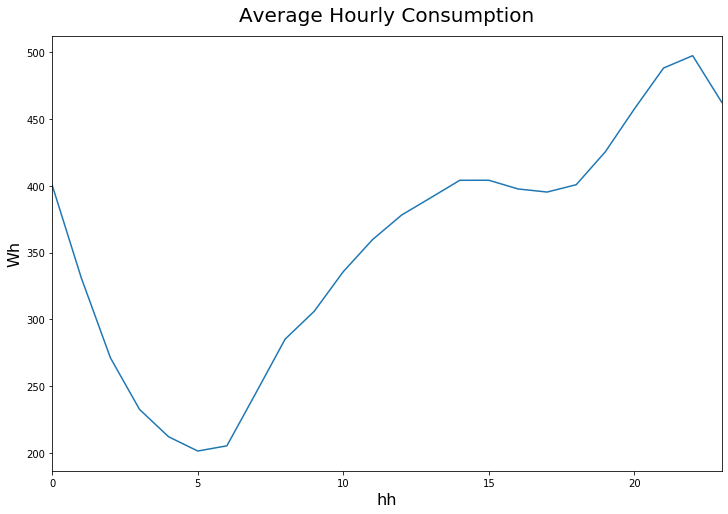

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Average Hourly Consumption", fontsize=20, y=1.02)
ax.set_ylabel("Wh", fontsize=16)
ax.set_xlabel("Hour", fontsize=16)

df_wod.groupby('hh').consumo.mean().plot(kind='line')

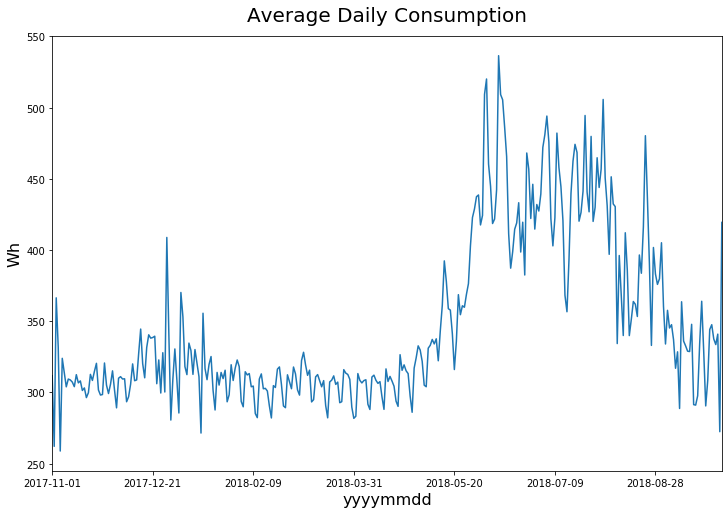

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Average Daily Consumption", fontsize=20, y=1.02)
ax.set_ylabel("Wh", fontsize=16)
ax.set_xlabel("Hour", fontsize=16)

df_wod.groupby('yyyymmdd').consumo.mean().plot(kind='line');

In [27]:
# Let's load the sheets

extF_t = pd.read_excel('TempSantigo.xlsx', sheet_name='temp-pres')
extF_t.rename(columns={"cobmox(combination of date and hour)":"DateTime"},inplace=True)
print(extF_t.columns)


Index(['date', 'hour', 'DateTime', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'snow_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [57]:
# And cross reference them to our energy consuption by timestamp

cons = df_wod.groupby(['DateTime']).consumo.mean().to_frame()
cons = cons.reset_index()
cons.head()
cons.DateTime = pd.to_datetime(cons.DateTime)
df_mext_t = cons.join(extF_t, how='left', rsuffix='_extF')
df_mext_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 17 columns):
DateTime               8014 non-null datetime64[ns]
consumo                8014 non-null float64
date                   8014 non-null datetime64[ns]
hour                   8014 non-null datetime64[ns]
DateTime_extF          8014 non-null datetime64[ns]
temp                   8014 non-null float64
feels_like             8014 non-null float64
temp_min               8014 non-null float64
temp_max               8014 non-null float64
pressure               8014 non-null int64
humidity               8014 non-null int64
wind_speed             8014 non-null float64
wind_deg               8014 non-null int64
rain_1h                14 non-null float64
snow_1h                0 non-null float64
clouds_all             8014 non-null int64
weather_description    8014 non-null object
dtypes: datetime64[ns](4), float64(8), int64(4), object(1)
memory usage: 1.0+ MB


In [58]:
df_mext_t.drop(columns=['date','hour','DateTime_extF','rain_1h', 'snow_1h','weather_description'], inplace=True)

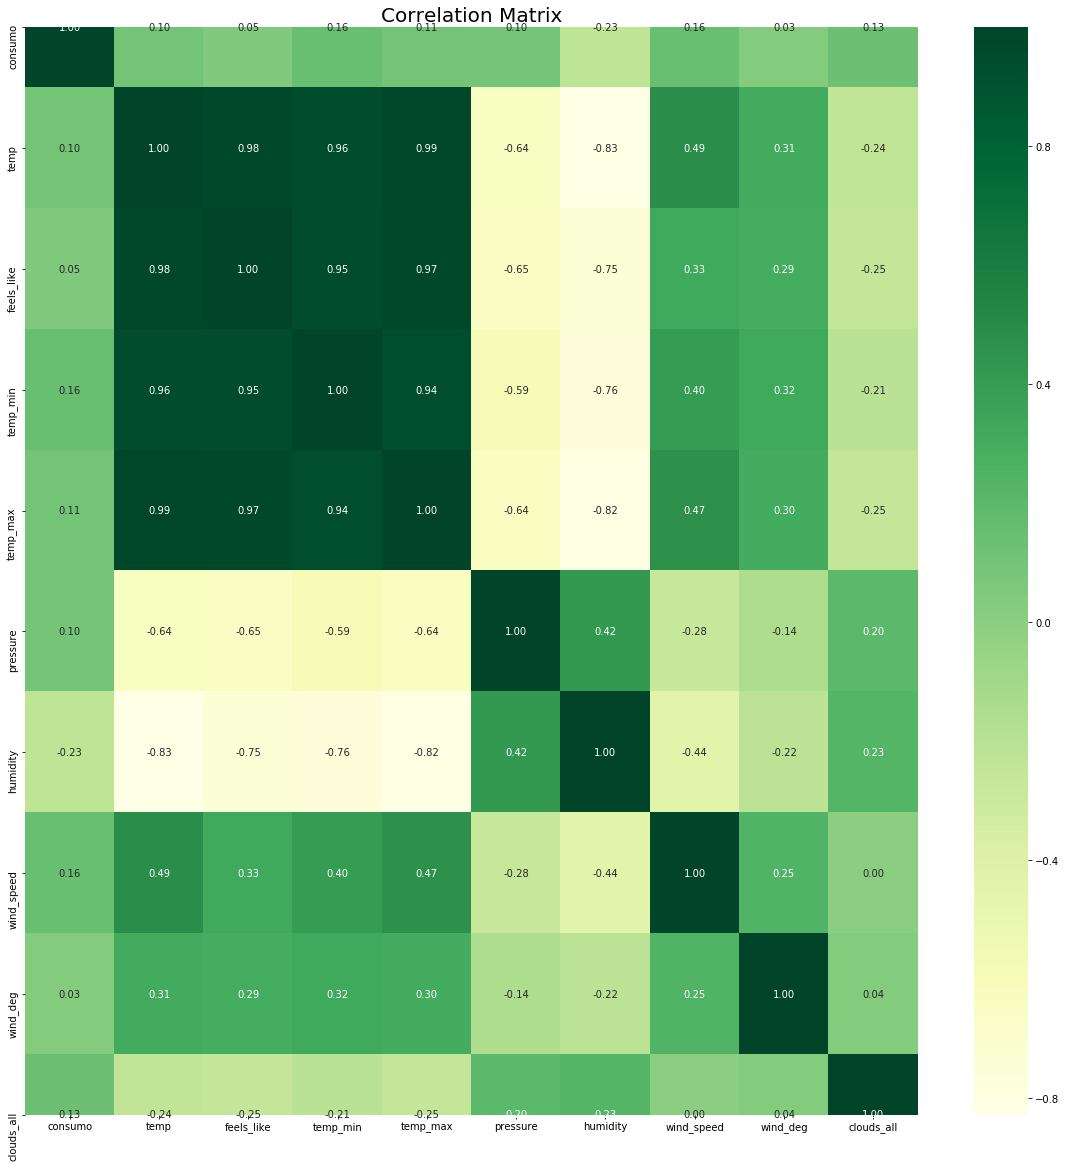

In [59]:
# Correlation External Features (Temp)

plt.figure(figsize=(20,20))
cm_e_t= df_mext_t.corr()
hm = sns.heatmap(cm_e_t, annot=True, fmt='.2f', cmap="YlGn")
hm.set_title('Correlation Matrix', fontsize=20, y=1.02)

#plt.savefig("external_feat_corr.png")

plt.show()

In [60]:
cm_e_t['consumo'].sort_values(ascending=False)

consumo       1.000000
wind_speed    0.157121
temp_min      0.156395
clouds_all    0.133409
temp_max      0.106006
temp          0.101881
pressure      0.097764
feels_like    0.047186
wind_deg      0.033380
humidity     -0.230434
Name: consumo, dtype: float64

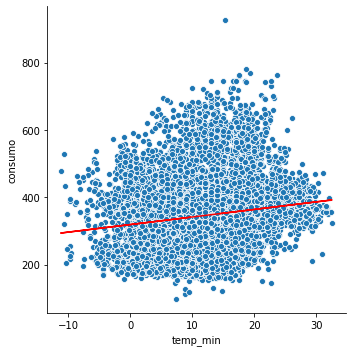

In [61]:
# Correlation lines

m, b = np.polyfit(df_mext_t.temp_min, df_mext_t.consumo, 1)
sns.relplot(x="temp_min",  y = 'consumo',  kind="scatter",  data =df_mext_t)
plt.plot(df_mext_t.temp_min, m*df_mext_t.temp_min + b, color='r')

plt.savefig("temp_min_consumo_corr.png");

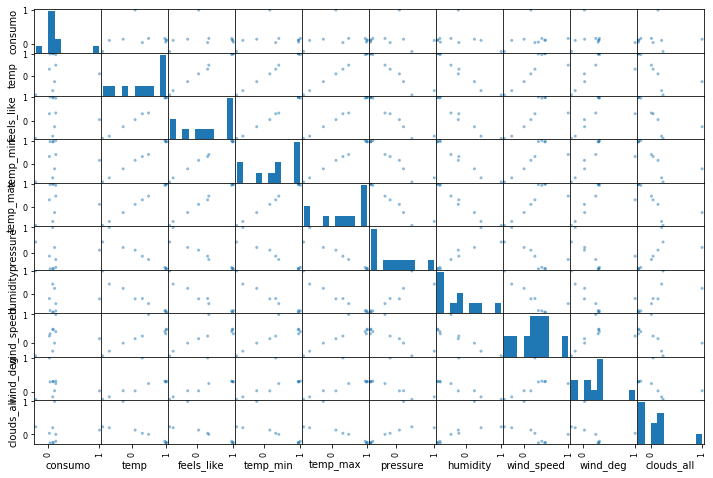

In [62]:
scatter_matrix(cm_e_t, figsize = (12,8));